## General Mixture Models

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

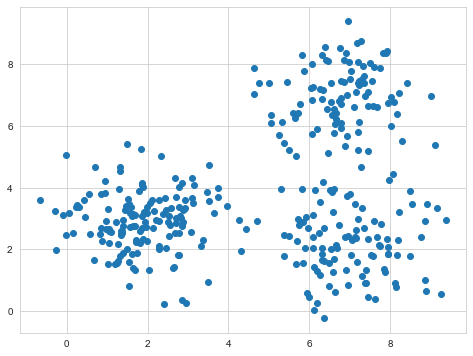

In [3]:
X = numpy.concatenate([numpy.random.normal((7, 2), 1, size=(100, 2)),
                       numpy.random.normal((2, 3), 1, size=(150, 2)),
                       numpy.random.normal((7, 7), 1, size=(100, 2))])

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
# Multivariate, because X has two columns
model = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, 3, X)

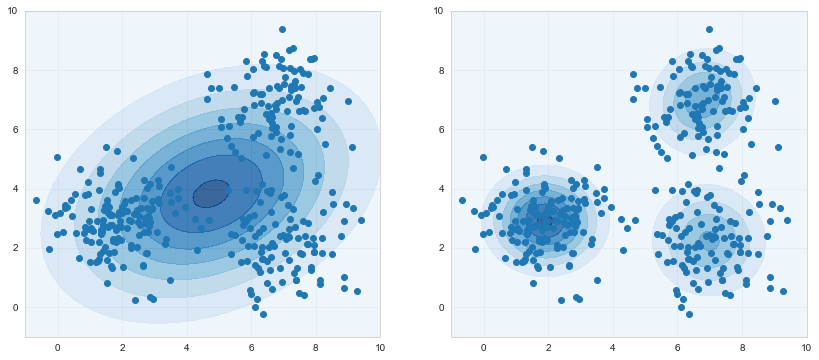

In [5]:
x = numpy.arange(-1, 10.1, .1)
y = numpy.arange(-1, 10.1, .1)

xx, yy = numpy.meshgrid(x, y)
x_ = numpy.array(list(zip(xx.flatten(), yy.flatten())))

p1 = MultivariateGaussianDistribution.from_samples(X).probability(x_).reshape(len(x), len(y))
p2 = model.probability(x_).reshape(len(x), len(y))


plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.contourf(xx, yy, p1, cmap='Blues', alpha=0.8)
plt.scatter(X[:,0], X[:,1])

plt.subplot(122)
plt.contourf(xx, yy, p2, cmap='Blues', alpha=0.8)
plt.scatter(X[:,0], X[:,1])
plt.show()

# A more complex example: independent component mixture models

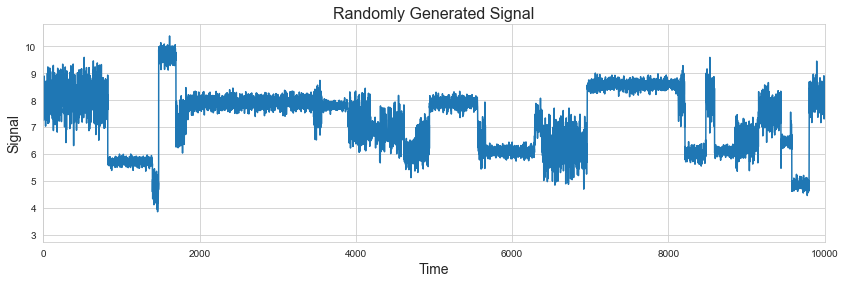

In [6]:
mu = numpy.random.normal(7, 1, size=250)

std = numpy.random.lognormal(-2.0, 0.4, size=250)
std[::2] += 0.3

dur = numpy.random.exponential(250, size=250)
dur[::2] -= 140
dur = numpy.abs(dur)

data = numpy.concatenate([numpy.random.normal(mu_, std_, int(t)) for mu_, std_, t in zip(mu, std, dur)])

plt.figure(figsize=(14, 4))
plt.title("Randomly Generated Signal", fontsize=16)
plt.plot(data)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Signal", fontsize=14)
plt.xlim(0, 10000)
plt.show()

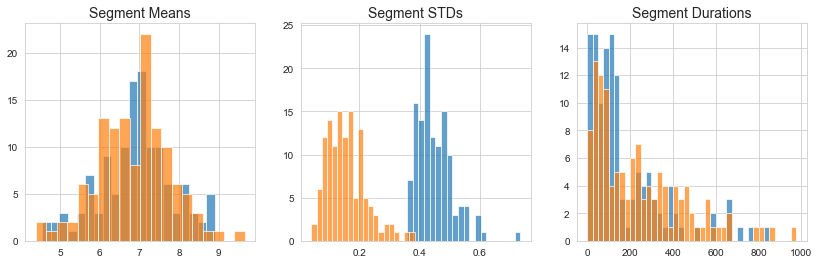

In [7]:
plt.figure(figsize=(14, 4))
plt.subplot(131)
plt.title("Segment Means", fontsize=14)
plt.hist(mu[::2], bins=20, alpha=0.7)
plt.hist(mu[1::2], bins=20, alpha=0.7)

plt.subplot(132)
plt.title("Segment STDs", fontsize=14)
plt.hist(std[::2], bins=20, alpha=0.7)
plt.hist(std[1::2], bins=20, alpha=0.7)

plt.subplot(133)
plt.title("Segment Durations", fontsize=14)
plt.hist(dur[::2], bins=numpy.arange(0, 1000, 25), alpha=0.7)
plt.hist(dur[1::2], bins=numpy.arange(0, 1000, 25), alpha=0.7)
plt.show()

In [8]:
X = numpy.array([mu, std, dur]).T.copy()

model = GeneralMixtureModel.from_samples([NormalDistribution, LogNormalDistribution, ExponentialDistribution], 2, X)
model

{
    "class" : "GeneralMixtureModel",
    "distributions" : [
        {
            "class" : "Distribution",
            "name" : "IndependentComponentsDistribution",
            "parameters" : [
                [
                    {
                        "class" : "Distribution",
                        "name" : "NormalDistribution",
                        "parameters" : [
                            6.860875394747595,
                            0.9160039638844738
                        ],
                        "frozen" : false
                    },
                    {
                        "class" : "Distribution",
                        "name" : "LogNormalDistribution",
                        "parameters" : [
                            -1.9378081347920282,
                            0.4293450697796185
                        ],
                        "frozen" : false
                    },
                    {
                        "class" : "Distribution",
 